In [54]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor

## loading data

In [2]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
automobile = fetch_ucirepo(id=10) 
  
# data (as pandas dataframes) 
X = automobile.data.features 
y = automobile.data.targets 

In [3]:
# change to DataFrame
df_car = pd.DataFrame(data=X, 
                      columns=automobile.data.feature_names)
df_car.head()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0


In [4]:
df_car.dtypes

price                float64
highway-mpg            int64
city-mpg               int64
peak-rpm             float64
horsepower           float64
compression-ratio    float64
stroke               float64
bore                 float64
fuel-system           object
engine-size            int64
num-of-cylinders       int64
engine-type           object
curb-weight            int64
height               float64
width                float64
length               float64
wheel-base           float64
engine-location       object
drive-wheels          object
body-style            object
num-of-doors         float64
aspiration            object
fuel-type             object
make                  object
normalized-losses    float64
dtype: object

In [5]:
df_car.isnull().sum()

price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
dtype: int64

In [6]:
df_car["normalized-losses"].value_counts()

normalized-losses
161.0    11
91.0      8
150.0     7
128.0     6
134.0     6
104.0     6
95.0      5
102.0     5
103.0     5
74.0      5
85.0      5
168.0     5
94.0      5
65.0      5
106.0     4
122.0     4
148.0     4
118.0     4
93.0      4
101.0     3
125.0     3
137.0     3
154.0     3
83.0      3
115.0     3
119.0     2
87.0      2
194.0     2
197.0     2
108.0     2
89.0      2
164.0     2
158.0     2
145.0     2
192.0     2
188.0     2
81.0      2
110.0     2
113.0     2
129.0     2
153.0     2
107.0     1
78.0      1
186.0     1
231.0     1
77.0      1
98.0      1
121.0     1
90.0      1
142.0     1
256.0     1
Name: count, dtype: int64

## Handle missing values

<Axes: >

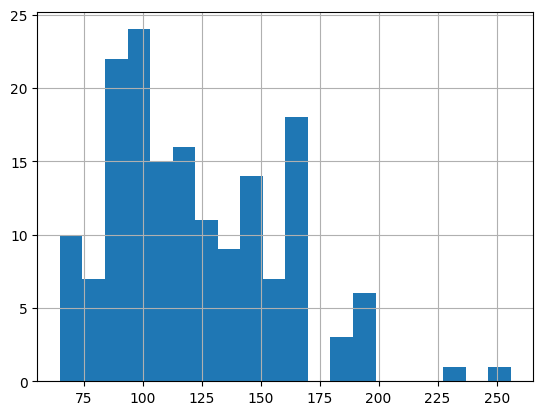

In [7]:
df_car["normalized-losses"].hist(bins=20)

In [8]:
#if missing values exists, handle them here
df_car_cleaned = df_car.copy()
df_car_cleaned["normalized-losses"] = df_car_cleaned["normalized-losses"].fillna(df_car_cleaned["normalized-losses"].mean())
df_car_cleaned = df_car_cleaned.dropna()
df_car_cleaned.head()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,122.0
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,122.0
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,122.0
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0


In [9]:
df_car_cleaned.isnull().sum()

price                0
highway-mpg          0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
engine-size          0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
dtype: int64

## EDA

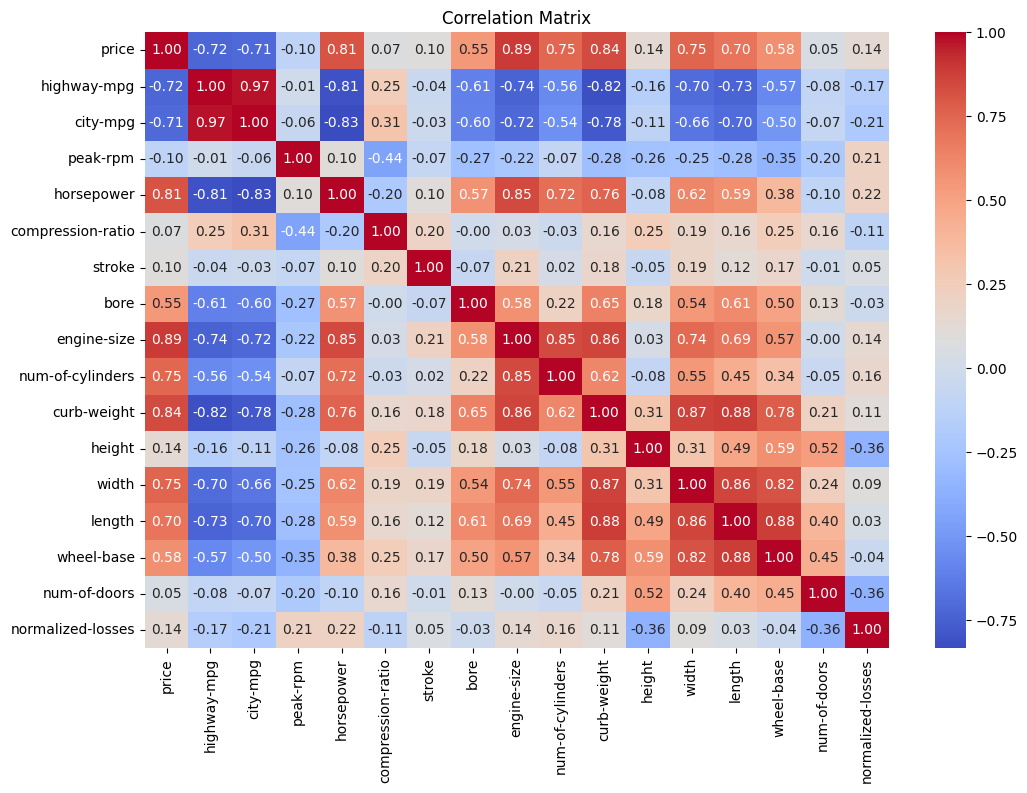

In [15]:
# explore correlations between variables and car prices
# only numerical columns are considered in correlation matrix
corr_matrix = df_car_cleaned.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.savefig("correlation_matrix.png")
plt.show()

In [ ]:
# show ranking about high correlations with price
correlation_with_price = corr_matrix["price"].sort_values(ascending=False).drop("price")
print(correlation_with_price)

engine-size          0.888778
curb-weight          0.835368
horsepower           0.812453
width                0.754649
num-of-cylinders     0.746007
length               0.695928
wheel-base           0.584951
bore                 0.546295
normalized-losses    0.138700
height               0.136234
stroke               0.096007
compression-ratio    0.074483
num-of-doors         0.046460
peak-rpm            -0.103835
city-mpg            -0.706618
highway-mpg         -0.719178
Name: price, dtype: float64


price is correlate with horsepower(0.81), engine-size(0.89), curb-weight(0.84). <br>
after training base model, adjest variables using PCA.

## training base model

In [19]:
# train base model
x = df_car_cleaned.drop("price", axis=1).select_dtypes(include=[np.number])
y = df_car_cleaned["price"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=123)
model = LinearRegression() # hypterparameter don't tune here
model.fit(x_train, y_train)

# R-squared
print("R-squared(train): {:.3f}".format(model.score(x_train, y_train)))
print("R-squared(test): {:.3f}".format(model.score(x_test, y_test)))

# coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

R-squared(train): 0.869
R-squared(test): 0.646
Coefficients: [ 3.13055444e+02 -3.42068401e+02  2.34174987e+00  4.13023753e+01
  2.94463837e+02 -3.74194294e+03 -2.57858234e+03  1.80464005e+02
 -1.54022210e+03  8.79362393e-01  4.93796145e+02  7.00821670e+02
 -9.11919501e+01 -2.57123461e+01  4.80001595e+01  5.96992720e+00]
Intercept: -59718.93624185386


In [38]:
def train_linear_regression_model(x_train, y_train, x_test, y_test):
    """ base model without feature engineering and hyperparameter tuning """
    model = LinearRegression()
    model.fit(x_train, y_train)
    print("R-squared(train): {:.3f}".format(model.score(x_train, y_train)))
    print("R-squared(test): {:.3f}".format(model.score(x_test, y_test)))
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    return model

def evaluate_linear_regression(x,y,test_size=0.2):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=test_size, random_state=123)
    model = train_linear_regression_model(x_train, y_train, x_test, y_test)
    return model

## feature engineering

- ☑️standard scaler 
- ☑️handle outlier
- feature selection(perhaps PCA?)
- cross validation
- check for linearity

### standard scaler

In [41]:
sc = StandardScaler()

# df_car_cleaned standard scaling
df_scaled = df_car_cleaned.copy()
numerical_cols = df_scaled.select_dtypes(include=[np.number]).columns.tolist()
df_scaled[numerical_cols] = sc.fit_transform(df_scaled[numerical_cols])
x = df_scaled.drop("price", axis=1).select_dtypes(include=[np.number])
y = df_scaled["price"]
evaluate_linear_regression(x,y)

R-squared(train): 0.869
R-squared(test): 0.646
Coefficients: [ 0.2638211  -0.27012632  0.13568472  0.19382204  0.14479109 -0.14591112
 -0.08682889  0.92786533 -0.19482159  0.05725744  0.14618819  0.18521425
 -0.14067692 -0.01955634  0.00587213  0.02386963]
Intercept: 0.026211549861946154


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


R-squared isn't change before standard scaler.

### outlier handling

In [33]:
def outlier_plot(df, numerical_columns):
    """ Plot histograms for multiple columns with outlier boundaries using IQR method """
    n_cols = 3 # 1 lines fof 3 plots
    n_rows = int(np.ceil(len(numerical_columns) / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_columns):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower) | (df[col] > upper)]

        # plot
        sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color="skyblue")
        axes[i].hist(df[col], bins=30, color='blue', alpha=0.7)
        axes[i].axvline(lower, color='r', linestyle='--')
        axes[i].axvline(upper, color='r', linestyle='--')
        axes[i].set_title(f"{col}\nOutliers: {len(outliers)}/{len(df)}", fontsize=10)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")
    # Remove empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()

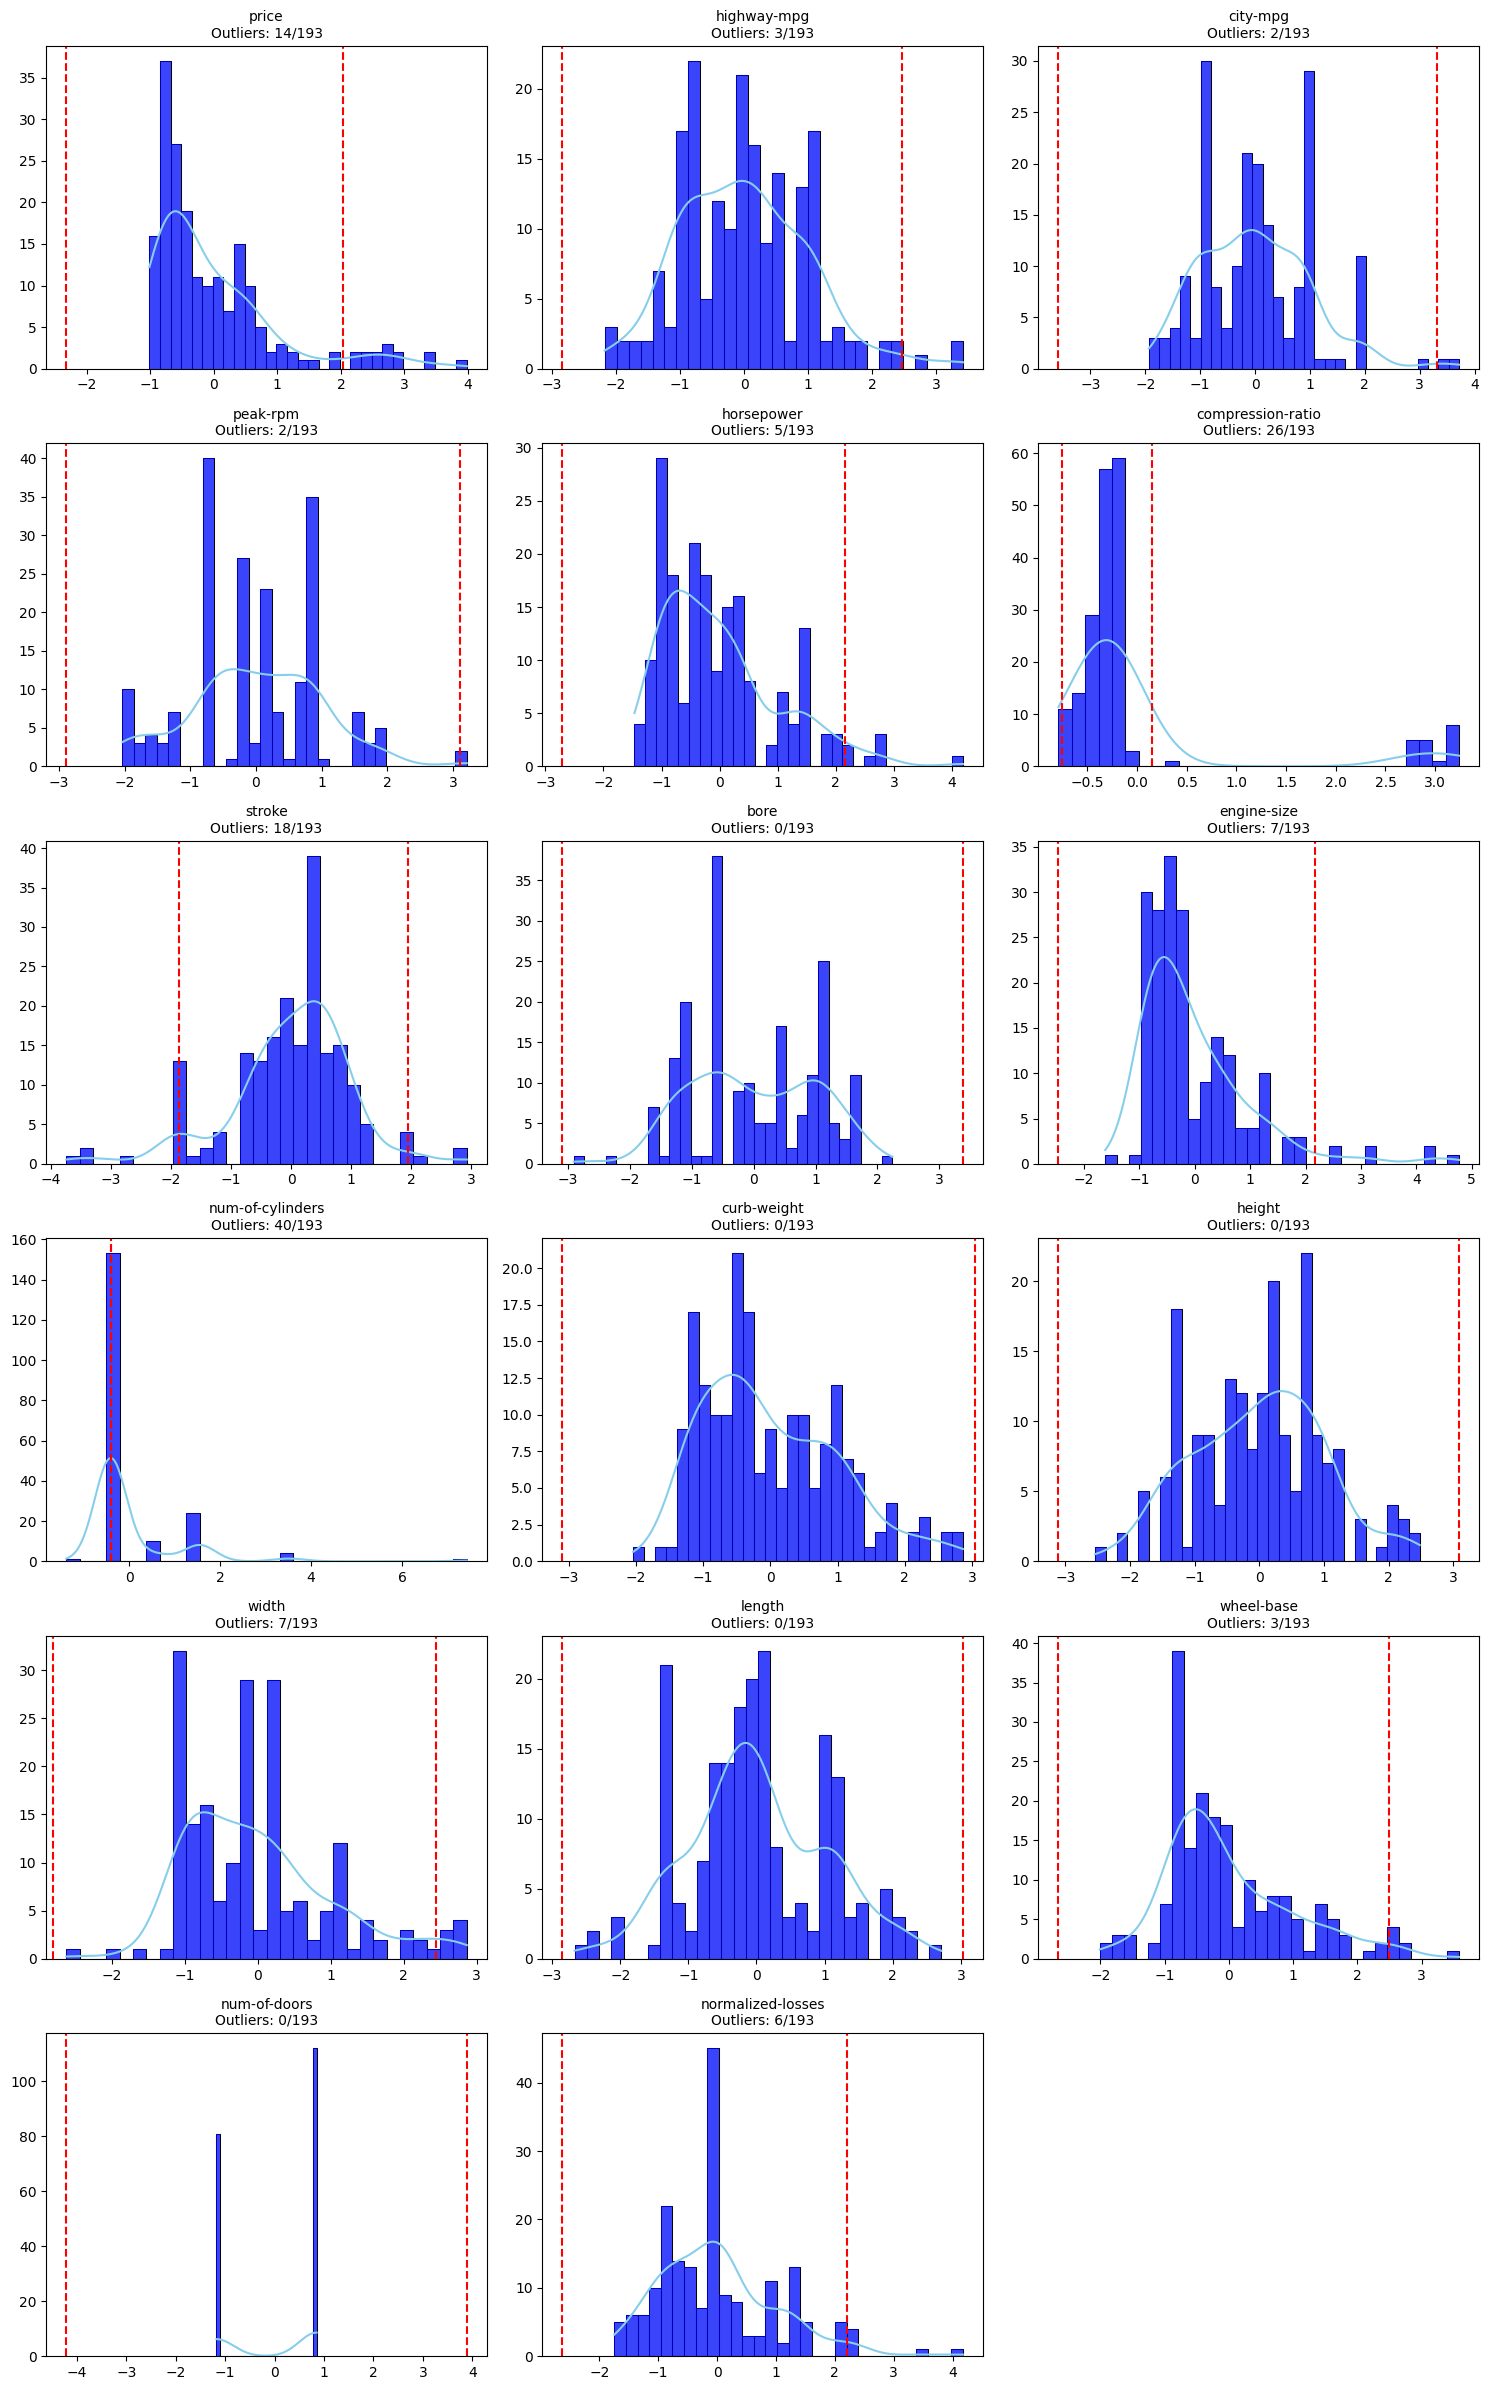

In [42]:
numerical_columns = df_scaled.select_dtypes(include=[np.number]).columns.tolist()
outlier_plot(df_scaled, numerical_columns)

In [43]:
# handle outliers by removing rows with outliers
df_car_no_outliers = df_scaled.copy()
for col in numerical_columns:
    Q1 = df_car_no_outliers[col].quantile(0.25)
    Q3 = df_car_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_car_no_outliers = df_car_no_outliers[(df_car_no_outliers[col] >= lower) & (df_car_no_outliers[col] <= upper)]

In [47]:
# train model after handling outliers
x = df_car_no_outliers.drop("price", axis=1).select_dtypes(include=[np.number])
y = df_car_no_outliers["price"]

evaluate_linear_regression(x,y)

R-squared(train): 0.887
R-squared(test): 0.325
Coefficients: [-2.29130957e-02 -2.14700255e-02 -3.42310133e-02  3.35101002e-01
  5.95129429e-01 -4.14556371e-03 -9.92697768e-02 -1.79451849e-01
  4.44089210e-16  5.37414077e-01  3.43404524e-02  9.42709505e-02
  1.56042968e-02 -2.02132162e-01  2.56910109e-03  1.66353266e-03]
Intercept: -0.028956085971698853


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Multicollinearity check
Since accuracy is not improving, verify whether multicollinearity exists.
After removing features with high VIF, re-evaluate the model performance. then may apply PCA.

In [49]:
vif_df = pd.DataFrame()
vif_df["feature"] = x.columns
vif_df["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif_df.sort_values(by="VIF", ascending=False))

              feature        VIF
7         engine-size  25.369250
6                bore  23.369086
8    num-of-cylinders  22.818209
1            city-mpg  19.748871
0         highway-mpg  16.226330
9         curb-weight   9.104297
5              stroke   8.549418
12             length   8.163818
13         wheel-base   7.262938
3          horsepower   6.231530
11              width   4.954020
10             height   2.965860
2            peak-rpm   2.317862
4   compression-ratio   2.312377
14       num-of-doors   2.086423
15  normalized-losses   2.026740


### Handle multicollinearity and remove redundant features

To reduce overfitting and stabilize the regression model, remove features with **high multicollinearity** (VIF > 10) and **high pairwise correlations** (|r| > 0.85). 

**Example of highly correlated feature pairs:**
- `city-mpg` and `highway-mpg` (r = 0.97) → keep `highway-mpg`
- `engine-size` and `horsepower` (r = 0.85) → keep `engine-size`
- `engine-size` and `num-of-cylinders` (r = 0.85) → keep `engine-size`
- `curb-weight` and `length` (r = 0.87) → keep `curb-weight`
- `length` and `wheel-base` (r = 0.88) → keep `curb-weight` as representative of size

**Features to remove:**
- `city-mpg`
- `horsepower`
- `num-of-cylinders`
- `length`
- `wheel-base`

**Rationale:**  
These variables are strongly correlated with others that capture similar vehicle characteristics.  


In [53]:
drop_features =[
    "city-mpg",
    "horsepower",
    "num-of-cylinders",
    "length",
    "wheel-base"
]
x_reduced = x.drop(columns=drop_features) # x is from df_car_no_outliers
evaluate_linear_regression(x_reduced, y)

R-squared(train): 0.835
R-squared(test): 0.335
Coefficients: [-0.13553556  0.04412789  0.28797123 -0.08229706 -0.15568971  0.06627319
  0.5927802  -0.00306269  0.10850713 -0.02140532  0.02311525]
Intercept: -0.03244764466905492


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False
